# 3.2 Classificador dos Dígitos 1x5

Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from numpy import linalg as LA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
TRAIN_PATH = 'dataset/train1x5.csv'
TEST_PATH = 'dataset/test1x5.csv'

train1x5 = pd.read_csv(TRAIN_PATH)
test1x5 = pd.read_csv(TEST_PATH)

Construindo vetores

In [3]:
X_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

X_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

# Perceptron 

- Tem que ser max_iter = n de pontos
- Guardar a melhor solução
- w pode comecar com 0 ou random

A linha de decisão é dada pela equação: $w_1x_1+w_2x_2+b=0$, onde $w_1 e w_2$​ são os pesos e b é o viés.

$h(x) = sign(w^Tx)$

$w=w+y_ix_i$

In [4]:
class PocketPla():
    def __init__(self,max_iter):
        self.max_iter = max_iter
        self.best_w = None
        self.best_eIN = None
        self.iterations = 0


    def constroiListaPCI(self,X,y,w):
        listaPCI = [i for i in range(len(X)) if np.sign(np.dot(X[i], w)) != y[i]]
        return listaPCI
    
    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.sign(np.dot(X, self.best_w))
    
    def getW(self): 
        return self.best_w
    
    def h(self, x): # função de ativação
        x = np.column_stack((np.ones(len(x)), x))
        return np.sign(np.dot(self.best_w, x))
    
    def getOriginalY(self, originalX):
        return (-self.best_w[0] - self.best_w[1]*originalX) / self.best_w[2]
    
    def getIterations(self):
        return self.iterations
    
    def getBestEin(self,X):
        return self.best_eIN

    def fit(self, X, y):
        X = np.column_stack((np.ones(len(X)), X))
        w = [0,0,0]
        self.best_w = w.copy()

        for _ in range(self.max_iter):
            self.iterations += 1
            listaPCI = self.constroiListaPCI(X,y,w)

            if len(listaPCI) == 0:
                break

            i = np.random.choice(listaPCI) # escolhe um índice aleatório da lista PCI
            w = w + y[i]*X[i] # atualizaÇÃO do vetor de pesos
            error_count = len(self.constroiListaPCI(X,y,w))/X.shape[0] # calcula o erro de classificação

            if self.best_eIN is None or error_count < self.best_eIN:
                self.best_eIN = error_count
                self.best_w = w
    
        return self

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train_transformed = np.where(y_train == 1, 1, -1) # transformando 1 em 1 e 5 em -1
n = X_train.shape[0]
PLA = PocketPla(n)
PLA.fit(X_train, y_train_transformed)
w = PLA.getW()

In [6]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_test_transformed = np.where(y_test == 1, 1, -1) # 1 onde é 1 e -1 onde é 5
y_pred_train = PLA.predict(X_train)
y_pred = PLA.predict(X_test)
#y_pred

In [7]:
ein = PLA.getBestEin(X_train)
eout = np.mean(y_pred != y_test_transformed)

print(f'Ein: {ein:.2f}')
print(f'Eout: {eout:.2f}')

Ein: 0.32
Eout: 0.34


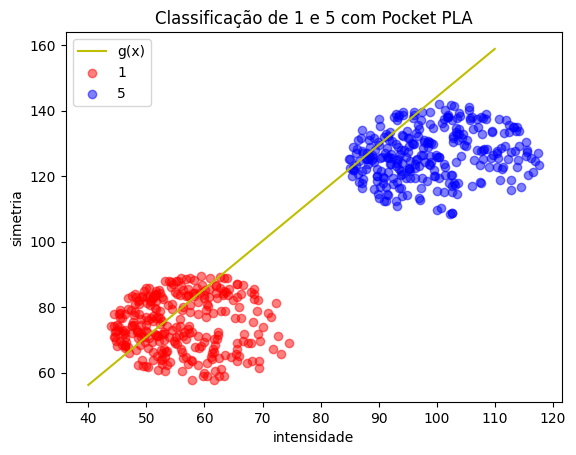

In [8]:
label_1 = test1x5[test1x5['label'] == 1]
label_5 = test1x5[test1x5['label'] == 5]
xOri = [40, 110]
yOri = [PLA.getOriginalY(xOri[0]), PLA.getOriginalY(xOri[1])]
plt.plot(xOri, yOri, label='g(x)',color='y')
plt.scatter(label_1['intensidade'], label_1['simetria'],color='red', label='1', alpha=0.5)
plt.scatter(label_5['intensidade'], label_5['simetria'],color='blue', label='5', alpha=0.5)
plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.title('Classificação de 1 e 5 com Pocket PLA')
plt.legend()
plt.show()


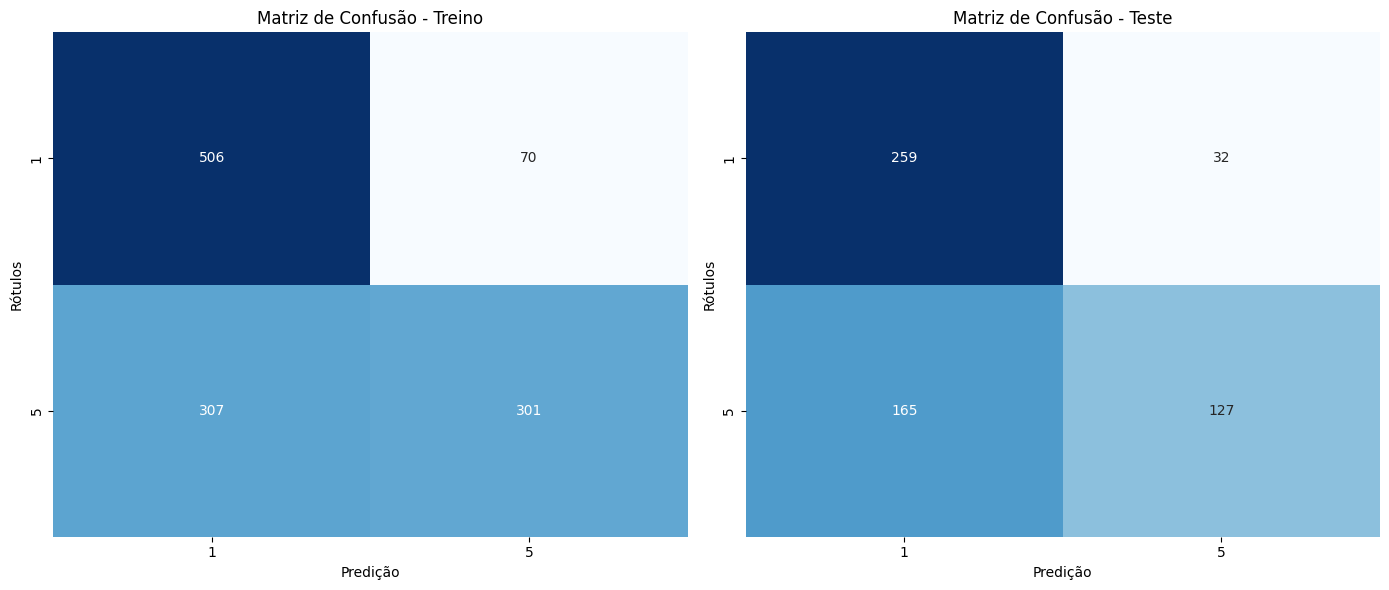

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cm_test = confusion_matrix(y_train_transformed, y_pred_train)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'], ax=axes[0])
axes[0].set_xlabel('Predição')
axes[0].set_ylabel('Rótulos')
axes[0].set_title('Matriz de Confusão - Treino')


cm_test = confusion_matrix(y_test_transformed, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'], ax=axes[1])
axes[1].set_xlabel('Predição')
axes[1].set_ylabel('Rótulos')
axes[1].set_title('Matriz de Confusão - Teste')


plt.tight_layout()
plt.show()

In [10]:
accuracy = np.mean(y_pred == y_test_transformed)
print(f'Acuracia: {accuracy*100:.2f}%')

Acuracia: 66.21%


In [11]:
print(classification_report(y_test_transformed, y_pred))

              precision    recall  f1-score   support

          -1       0.61      0.89      0.72       291
           1       0.80      0.43      0.56       292

    accuracy                           0.66       583
   macro avg       0.70      0.66      0.64       583
weighted avg       0.70      0.66      0.64       583



# Linear Regression

vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [12]:
class LinearRegression():
    def __init__(self):
        self.w = None

    def getW(self):
        return self.w
    
    def fit(self, _X, _y):
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ _y
        return self
    
    def predict(self, _X):
        if self.w is None:
            raise Exception('Modelo não treinado')
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        return X @ self.w
    

class LRClassifier():
    def execute(self, _X, _y):
        lr = LinearRegression()
        lr.fit(_X, _y)
        self.w = lr.getW()
                
    def predict(self, x_):
        return np.sign(np.dot(np.insert(x_, 0, 1,axis=1), self.w))
     
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [13]:
lrc = LRClassifier()
lrc.execute(X_train, y_train_transformed)
w = lrc.w
predictions_train = lrc.predict(X_train)
predictions = lrc.predict(X_test)

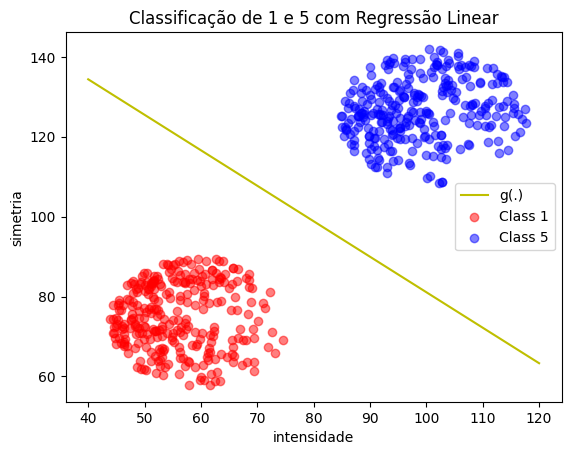

In [14]:
xOri = [40, 120]
yOri = [lrc.getRegressionY(xOri[0]), lrc.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='g(.)')

# Mask for class 1
mask_1 = (y_test_transformed == 1)
plt.scatter(X_test[mask_1, 0], X_test[mask_1, 1], c='red', label='Class 1', alpha = 0.5)

# Mask for class 5
mask_5 = (y_test_transformed == -1)
plt.scatter(X_test[mask_5, 0], X_test[mask_5, 1], c='blue', label='Class 5', alpha = 0.5)

plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.title('Classificação de 1 e 5 com Regressão Linear')
plt.legend()
plt.show()

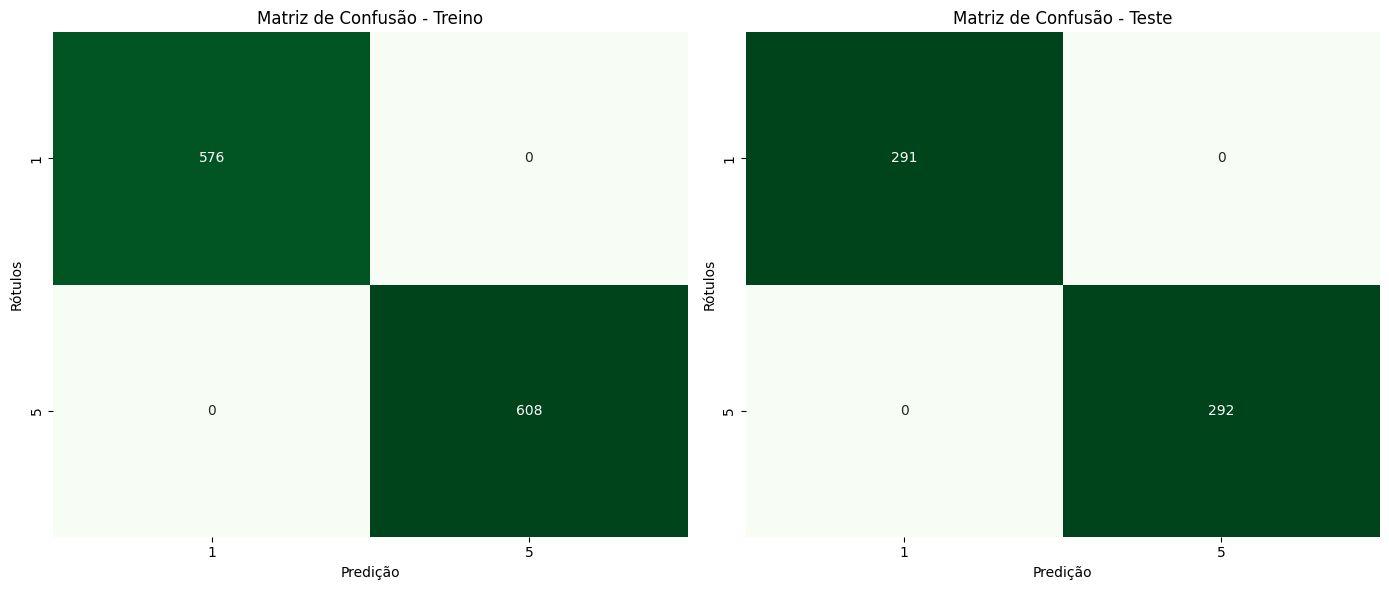

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cm_test = confusion_matrix(y_train_transformed, predictions_train)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'], ax=axes[0])
axes[0].set_xlabel('Predição')
axes[0].set_ylabel('Rótulos')
axes[0].set_title('Matriz de Confusão - Treino')


cm_test = confusion_matrix(y_test_transformed, predictions)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'], ax=axes[1])
axes[1].set_xlabel('Predição')
axes[1].set_ylabel('Rótulos')
axes[1].set_title('Matriz de Confusão - Teste')


plt.tight_layout()
plt.show()

In [16]:
accuracy = np.mean(predictions_train == y_train_transformed)
print(f'Acuracia Treino: {accuracy*100:.2f}%')

accuracy = np.mean(predictions == y_test_transformed)
print(f'Acuracia Teste: {accuracy*100:.2f}%')

Acuracia Treino: 100.00%
Acuracia Teste: 100.00%


In [17]:
print('Estatisticas de Treino')
print(classification_report(y_train_transformed, predictions_train))

print('')

print('Estatisticas de Treino')
print(classification_report(y_test_transformed, predictions))

Estatisticas de Treino
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184


Estatisticas de Treino
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



# Regressão Logistica

### Equações:

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ .........inicializada com zeros

$ B = peso/parâmetro \: unico:\:Bias$ 

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$

A = $\sigma ( W^T*X + b ) $    ........ (probabilidades preditas (1 x m ) )


### Função sigmoide:

$$
y(s) = \frac{1}{1 + e^{-y_s}} = \frac{e^{y_s}}{1+e^{y_s}}
$$

### Log-verossimilhança / Log Loss / Entropia Cruzada Binária (custo):

$$
J(θ) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_θ(x^{(i)})) \right]
$$

### Gradiente:

$$
∇J(θ) = \frac{1}{m} X^T \left(h_θ(X) - y\right)
$$

### Normalização

In [18]:
scaler = MinMaxScaler()

#ajusta e transforma
train1x5_scaled = scaler.fit_transform(train1x5.drop('label', axis=1)) 
#transforma para evitar vazamento
test1x5_scaled = scaler.transform(test1x5.drop('label', axis=1)) 

train1x5['i_normalizada'] = train1x5_scaled[:,0]
train1x5['s_normalizada'] = train1x5_scaled[:,1]

test1x5['i_normalizada'] = test1x5_scaled[:,0]
test1x5['s_normalizada'] = test1x5_scaled[:,1]

In [19]:
#para testes
y_train_orig = train1x5['label']
y_test_orig = test1x5['label']

#normalizando
x_train = np.hstack((np.ones((len(train1x5), 1)), train1x5[['i_normalizada', 's_normalizada']].values))
y_train = np.array([1 if y_ == 1 else -1 for y_ in train1x5['label']])

x_test = np.hstack((np.ones((len(test1x5), 1)), test1x5[['i_normalizada', 's_normalizada']].values))
y_test = np.array([1 if y_ == 1 else -1 for y_ in test1x5['label']])


#escalonando
x_train_orig = scaler.inverse_transform(train1x5[['i_normalizada', 's_normalizada']].values)
x_train_orig = np.hstack((np.ones((len(train1x5), 1)), x_train_orig))

x_test_orig = scaler.inverse_transform(test1x5[['i_normalizada', 's_normalizada']].values)
x_test_orig = np.hstack((np.ones((len(test1x5), 1)), x_test_orig))

### Funções

In [20]:
def acuracia(y, pred, conjunto):

    total = len(y)

    acertos = 0

    for i in range(total):
        if pred[i] == y[i]:
            acertos += 1
    
    print(f"Acuracia do modelo no conjunto {conjunto}: {(acertos/total)*100:.2f}%")

In [21]:
class RegressaoLogistica():

    def __init__(self, learning_rate = 0.1, iterations = 10000, bs = 12):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = bs

    def sigmoide(self, x):
        return 1/(1 + np.exp(-x))        

    def fit(self, X, Y):
        
        X = np.array(X)
        Y = np.array(Y)

        #numero de amostras
        m = X.shape[0]
        
        #numero de features
        n = X.shape[1]

        W = np.zeros(n, dtype = float)

        self.W = []
        
        
        for i in range(self.iterations):
            
            #vetor acumulador dos gradientes
            v_g = np.zeros(n, dtype = float)

            
            #caso o lote seja menor, escolher aleatoriamente uma nova mini-amostra
            if self.batch_size < m:

                indices = rnd.sample(range(m), self.batch_size)

                batch_x = [X[j] for j in indices]
                batch_y = [Y[j] for j in indices]

            else:
                batch_x = X
                batch_y = Y

            
            for x_, y_ in zip(batch_x, batch_y):
                
                #gradiente dos pesos atuais com sigmoide inversa
                v_g += (y_ * x_) / (1 + np.exp((y_ * W).T @ x_))

            #gradiente medio
            g_m = v_g / self.batch_size

            #condição de parada
            if LA.norm(g_m) < 0.0001:
                break

            #atualiza os pesos
            W += self.learning_rate * g_m

        self.W = W

    def predict(self, X):
        
        #probabilidade
        Z = np.dot(X, self.W)
        prob = np.exp(Z) / (1 + np.exp(Z))
                
        y_pred = np.where(prob >= 0.5, 1, -1)

        return y_pred
    
    def normaliza_y(self, x, shift = 0):
        return (-self.W[0] + shift - self.W[1] * x) / self.W[2]

### Aplicação

In [22]:
rl = RegressaoLogistica()
rl.fit(x_train, y_train)
y_pred_treino = rl.predict(x_train)

In [23]:
y_pred_teste = rl.predict(x_test)

### Vizualização Gráfica

In [24]:
def plot(x_or, y_pred, data, modelo):

    xmin = x_or[:,1].min()
    xmax = x_or[:,1].max()

    sns.scatterplot(x='intensidade', y='simetria', hue=y_pred, data=data, palette='coolwarm', s=5)

    x = np.linspace(xmin, xmax, 100)

    x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
    y_normalized = modelo.normaliza_y(x_normalized)

    y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

    plt.plot(x, y, 'y-', label='g(.)')
    plt.legend(loc='upper right')
    plt.show()

Treino


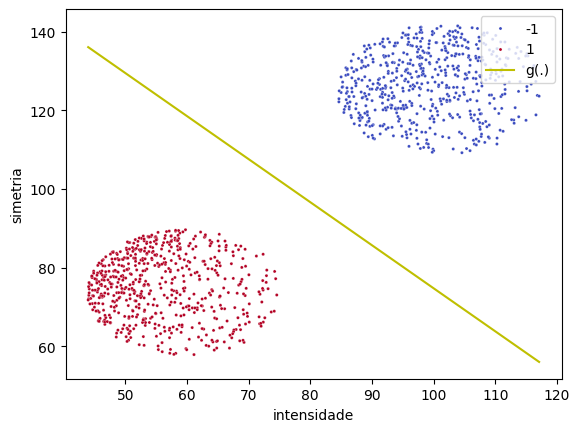


Teste


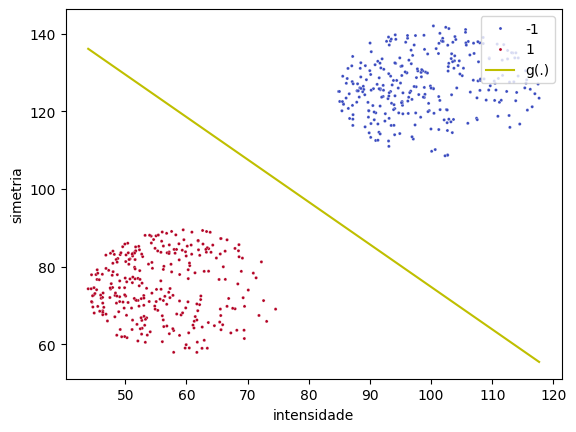

In [25]:
print('Treino')
plot(x_train_orig, y_pred_treino, train1x5, rl)

print('')
print('Teste')
plot(x_test_orig, y_pred_teste, test1x5, rl)

## Eficiência da Classificação

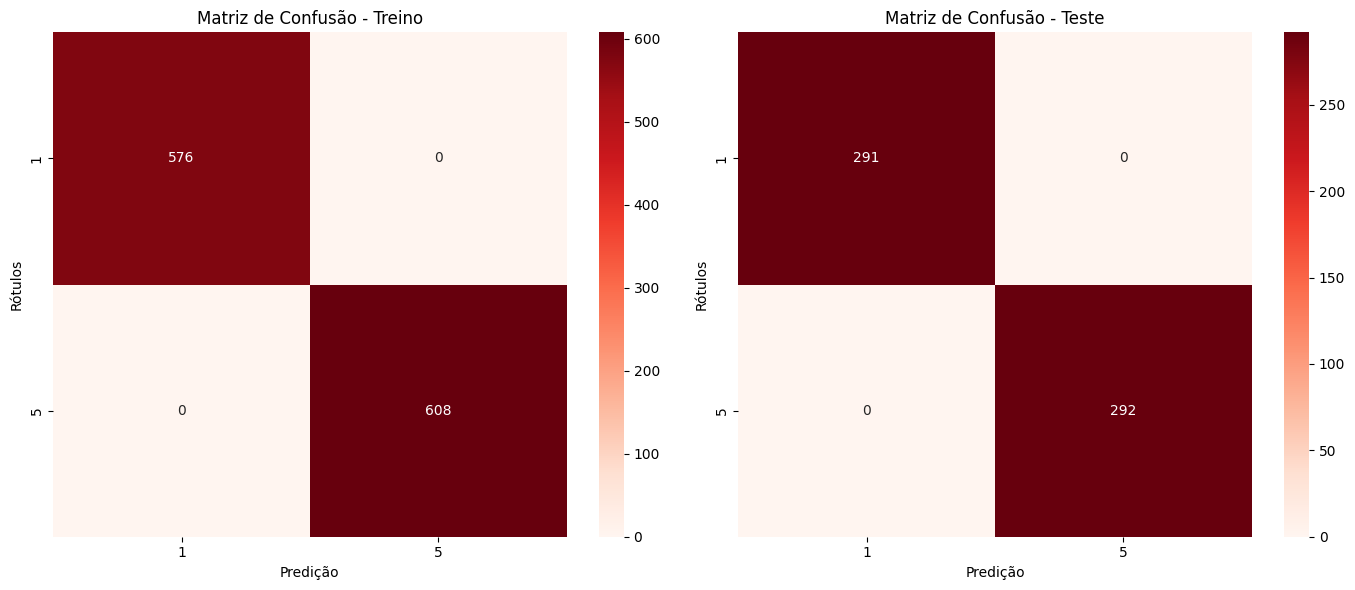

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cm = confusion_matrix(y_train, y_pred_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'], ax=axes[0])
axes[0].set_xlabel('Predição')
axes[0].set_ylabel('Rótulos')
axes[0].set_title('Matriz de Confusão - Treino')

cm_test = confusion_matrix(y_test, y_pred_teste)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'], ax=axes[1])
axes[1].set_xlabel('Predição')
axes[1].set_ylabel('Rótulos')
axes[1].set_title('Matriz de Confusão - Teste')

plt.tight_layout()
plt.show()

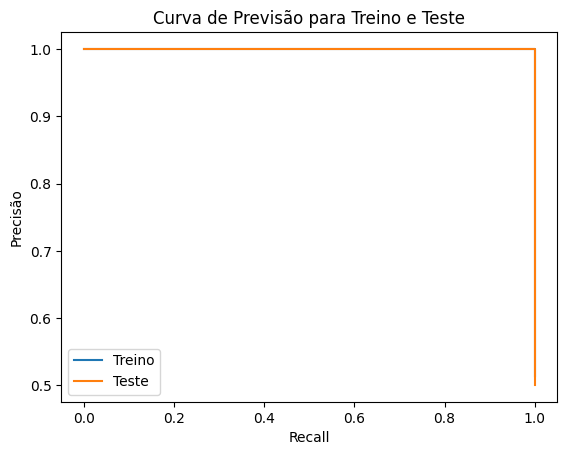

In [27]:
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_treino)
plt.plot(recall, precision, label=f'Treino')

precision_, recall_, thresholds_ = precision_recall_curve(y_test, y_pred_teste)
plt.plot(recall_, precision_, label=f'Teste')


plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Previsão para Treino e Teste')
plt.legend()
plt.show()

In [28]:
acuracia(y_train, y_pred_treino, "teste")
acuracia(y_test, y_pred_teste, "treino")

Acuracia do modelo no conjunto teste: 100.00%
Acuracia do modelo no conjunto treino: 100.00%


## Métricas Gerais

In [29]:
#erro dentro da amostra (Ein)
N_in = len(y_train)
eIn = 0
for i in range(N_in):
    if(y_pred_treino[i] != y_train[i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#erro fora da amostra (Eout)
N_out = len(y_test)
eOut = 0
for i in range(N_out):
    if(y_pred_teste[i] != y_test[i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.0
Eout = 0.0


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Metricas de Erro - Treino')
print("Erro médio quadrático: ", mean_squared_error(y_train, y_pred_treino))
print("Erro médio absoluto: ", mean_absolute_error(y_train, y_pred_treino))

print('')
print('Metricas de Erro - Teste')
print("Erro médio quadrático: ", mean_squared_error(y_test, y_pred_teste))
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred_teste))

Metricas de Erro - Treino
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0

Metricas de Erro - Teste
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0


### Comparação com biblioteca pronta

Acuracia: 100.00%
Classificação:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



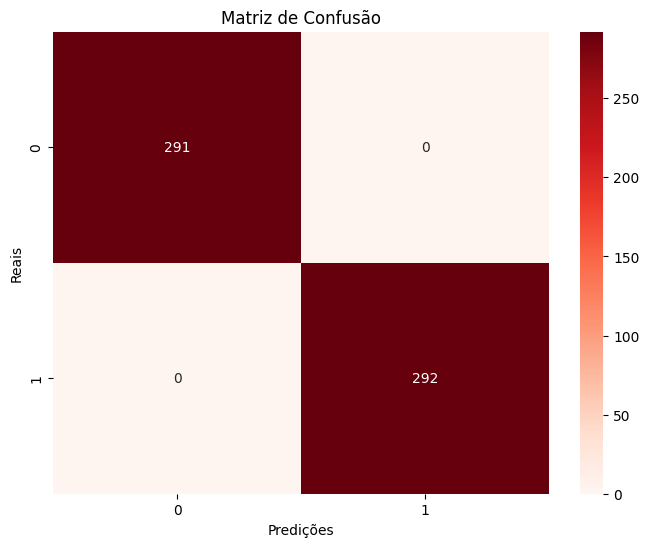

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Acuracia: {accuracy*100:.2f}%')
print('Classificação:')
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predições')
plt.ylabel('Reais')
plt.title('Matriz de Confusão')
plt.show()